In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as tt
import cv2

In [5]:
model_ultra = torch.load('../ML_core/train_and_evaluation/DeepLabV3Plus_resnet_0.650iou_0.852acc.pth')

In [6]:
from PIL import Image
image = Image.open('C:/Users/tolik/information_technology/third_year/practice_project/CoreAnalysis-ML/data_for_study/photos/1000509.jpeg')
orig_mask = np.load('C:/Users/tolik/information_technology/third_year/practice_project/CoreAnalysis-ML/data_for_study/labels/ultraviolet/label_1000509.npz')['x']
print('image size:', image.size)

image size: (645, 2263)


In [7]:
def model_predict(model, img):
    #print(f'Подано изображение в формате {type(img)}')
    # изображение в формате np или PIL
    #img = Image.fromarray(img)
    # разобаться с ошибкой byte
    
    
    # сохраним исходный размер
    w, h = img.size
    #print(f'Размеры изображения до преобразований: {h}*{w}')
    # предобработка изображения
    need_tf = tt.Compose([
        tt.Resize([768, 512]),
        tt.ToTensor(),
        tt.Normalize(mean=[0.485, 0.456, 0.406],
                      std=[0.229, 0.224, 0.225])
    ])
    transformed_img = need_tf(img)
    #print(f'После преобразований изображение имеет размеры {transformed_img.shape}')
    
    # нахождение маски
    pred = model.predict(transformed_img.unsqueeze(0))
    pred = (pred.argmax(dim=1))
    #print(f'Маска имеет размеры {pred.shape} и тип {type(pred)}')
    pred = tt.Resize([h, w])(pred)
    pred = pred.squeeze()
    #print(f'После преобразований маска имеет размеры {pred.shape} и тип {type(pred)}')
    return pred.numpy()

In [8]:
pred = model_predict(model_ultra, image)

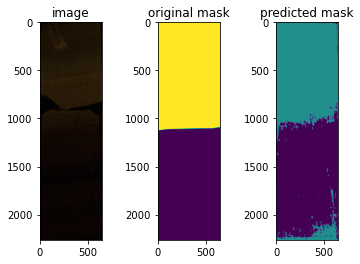

In [9]:
ax1 = plt.subplot(131)
plt.imshow(image)
ax1.set_title('image')

ax2 = plt.subplot(132)
plt.imshow(orig_mask)
ax2.set_title('original mask')

ax3 = plt.subplot(133)
plt.imshow(pred)
ax3.set_title('predicted mask')
plt.pause(0.001) 

# median_filter = cv2.medianBlur(pred, 5)
# ax4 = plt.subplot(144)
# plt.imshow(median_filter)
# ax4.set_title('predicted mask with filter')
# plt.pause(0.001)  

Постобработка фотографий: None-Maximum-Supression - устранение артефактов сегментации

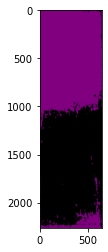

In [11]:
rgb_pred = cv2.imread('C:/Users/tolik/information_technology/third_year/practice_project/CoreAnalysis-ML/data_for_study/predict/ultra/1000509.png')
plt.imshow(rgb_pred)

Text(0.5, 1.0, 'bilateral blur')

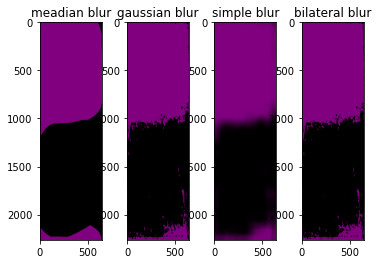

In [63]:
median_filter = cv2.medianBlur(rgb_pred, 211)
gaussian_filter = cv2.GaussianBlur(rgb_pred, (7,7), 1)
blur = cv2.blur(rgb_pred, (101,101))
bilFilter = cv2.bilateralFilter(rgb_pred, 21, 13, 12)
ax1 = plt.subplot(141)
ax1.imshow(median_filter)
ax1.set_title('meadian blur')

ax2 = plt.subplot(142)
ax2.imshow(gaussian_filter)
ax2.set_title('gaussian blur')

ax3 = plt.subplot(143)
ax3.imshow(blur)
ax3.set_title('simple blur')

ax4 = plt.subplot(144)
ax4.imshow(bilFilter)
ax4.set_title('bilateral blur')